# Hauptkomponentenzerlegung (PCA)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Erzeugen eines 0- und 1-Vektors
null_vec = np.zeros(10)
eins_vec = np.ones(10)

In [13]:
print(eins_vec)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
# Transponieren eines Vektors und Berechnung der Vektorlänge (Euklid'sche oder 2-Norm)
np.transpose(null_vec)
np.linalg.norm(eins_vec)

3.1622776601683795

In [16]:
# Berechnung des Skalarprodukts
np.dot(null_vec, eins_vec)b

0.0

In [18]:
vec1=[3, 1, 2]
vec2=[4, 0, 3]
np.dot(vec1, vec2)

18

In [29]:
# Erzeugen einer 0- und 1-Matrix
null_mat = np.zeros([5, 5])
#eins_mat = np.ones([m, n])
matrix = np.arange(25)
matrix

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [30]:
matrix = matrix + 1 # null fällt weg
matrix

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

In [31]:
matrix = np.reshape(matrix,(5,5))
matrix

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [32]:
# transponieren
np.transpose(matrix)

array([[ 1,  6, 11, 16, 21],
       [ 2,  7, 12, 17, 22],
       [ 3,  8, 13, 18, 23],
       [ 4,  9, 14, 19, 24],
       [ 5, 10, 15, 20, 25]])

In [33]:
# Norm der Matrix bestimmen: Welches Potential/gewicht hat die Matrix
np.linalg.norm(matrix)

74.33034373659252

In [35]:
# Beispiel seite 10
vec = [2,1,3]
vec

[2, 1, 3]

In [36]:
A = [[4, 1, 3], [1,2,1], [3, 1, 5]]
A

[[4, 1, 3], [1, 2, 1], [3, 1, 5]]

In [38]:
# Matrix mit vektor multiplizieren
np.dot(A, vec)

array([18,  7, 22])

In [39]:
# Dimension reduzieren
A = [[1,2,3,4,5], [6,7,8,9,10]]
A

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]

In [40]:
vec = [4,7,3,1,3]
vec

[4, 7, 3, 1, 3]

In [42]:
np.dot(A, vec) # Als ergebnis erhalten wir ein zweidimensionaler Vektor.

array([ 46, 136])

## Beispiel Dimensionsreduktion Schweizer Rolle

In [45]:
# Beispiel Schweizer Rolle
from sklearn import datasets
# shape ist die Klassifikation der Daten, 100 Punkte, 3 dimensionen 
data, shape = datasets.make_swiss_roll(n_samples=1000, noise=0.0)
data

array([[ 5.18672708, 14.12709924,  4.73517159],
       [ 1.38585843, 11.32223624, 13.96971257],
       [11.49162722, 20.74179116, -4.15430316],
       ...,
       [ 1.4235797 ,  1.77238553, -4.79414189],
       [-9.45199737,  4.92299434, -1.68745476],
       [-9.39646078, 14.65543932,  0.2378502 ]])

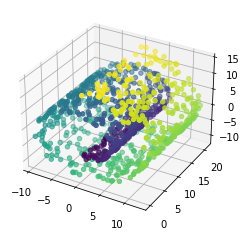

In [58]:
import matplotlib.pyplot as plt
# erzeugt leeres 3D-Koordinatensystem
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# Scatterplot plotten
ax.scatter(data[:,0], data[:,1], data[:,2], c=shape)
plt.show()

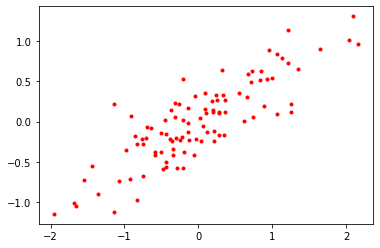

In [73]:
# PCA-testdatei einlesen
# Die Daten sind um den Ursprung zentriert und zwischen -1 und 1 normiert 
data = np.loadtxt("decomp_test.txt", delimiter=",")
plt.plot(data[:,0], data[:,1], 'r.')

In [75]:
from sklearn.decomposition import PCA
model = PCA(n_components=2) # reduktion auf zwei komponenten
# Projiziere die daten gleich anhand der Projektion
data_proj = model.fit_transform(data)

data_proj hat keine x,y sondern die Projizierten koordinaten aller punkte auf der x-achse und alternativ aller punkte auf der X-achse

In [78]:
model.components_ # liefert die Vektoren, aber nicht transponiert 
np.transpose(model.components_)

array([[ 0.87088481, -0.49148718],
       [ 0.49148718,  0.87088481]])

In [79]:
np.dot(np.transpose(model.components_)[:,0],np.transpose(model.components_)[:,1])

0.0

In [80]:
model.explained_variance_ratio_

array([0.94061816, 0.05938184])

94.06 % der Information steckt entlang der ersten Komponente 

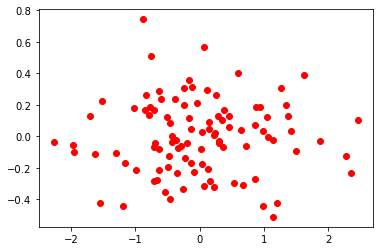

In [83]:
plt.plot(data_proj[:,0], data_proj[:,1],'ro')

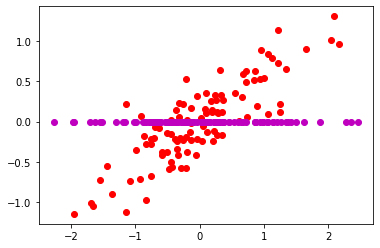

In [94]:
# Projektion auf die alten Daten 
# afür wird ein nullvektor benötigt 
y = np.zeros([100])
plt.plot(data[:,0], data[:,1],'ro')
plt.plot(data_proj[:,0], y,'mo')
plt.show()

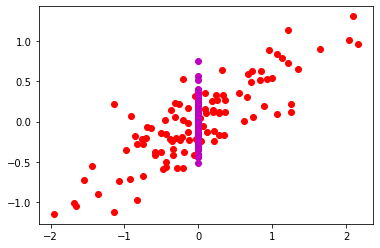

In [95]:
# Projektion auf die alten Daten 
# afür wird ein nullvektor benötigt 
y = np.zeros([100])
plt.plot(data[:,0], data[:,1],'ro')
plt.plot(y, data_proj[:,1],'mo')

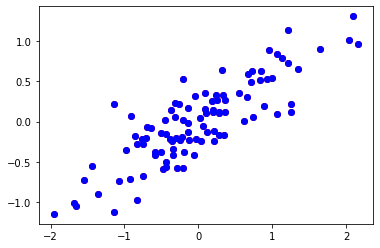

In [97]:
data_recovered = model.inverse_transform(data_proj)
plt.plot(data[:,0], data[:,1],'ro')
plt.plot(data_recovered[:,0], data_recovered [:,1],'bo')
# keine Roten Punkte, da kein Informationslust vorliegt 

## Praktische Übung
Datensatz: handschriftlicher Ziffern (Paket sklearn)
- Matrix der Grösse 1797x64 (d.h. 1797 Bilder mit Auflösung 8x8)
- 64 dimensionaler Vektorraum mit 1797 Punkten

### Ziel ist den Raum auf einen 2-Dimensionalen Raum zu Reduzieren

In [109]:
# Datensatz laden und Grösse anzeigen
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

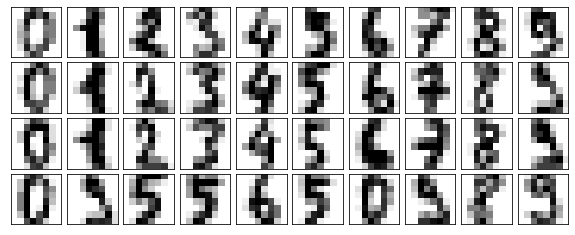

In [111]:
# Datensatz als 4x10 Graubilder anzeigen (Datei mplot.py)
# erste 40 stück
# mplot ist ein lokales Modul von Moodle
from myplot import plot_digits
plot_digits(digits.data)
plt.show()

In [112]:
# Dimensionsreduktion auf zwei Hauptkomponenten
from sklearn.decomposition import PCA
model = PCA(n_components=2) # nur zwei komponenten interessieren uns 
d_proj = model.fit_transform(digits.data)
model.explained_variance_ratio_

array([0.14890594, 0.13618771])

Der 64-Dimensionaler wurde auf 2 Dimensionen reduziert. In der ersten Achse sind noch 15% vorhanden, in der zweiten 14% . 71% sind verloren gegangen

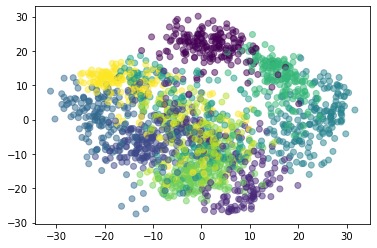

In [113]:
plt.scatter(d_proj[:,0], d_proj[:,1], c=digits.target, alpha=0.5)
# digits.target enthält die Klassifikation der Buchstaben
# cmap=plt.cm.get_cmap('nipy_spectral', 10) und plt.colorbar()
plt.show()

In dieser Projektion ist das finden von Clustern zu den Ziffern sehr schwierig 

### Daten Zurückdimensionieren

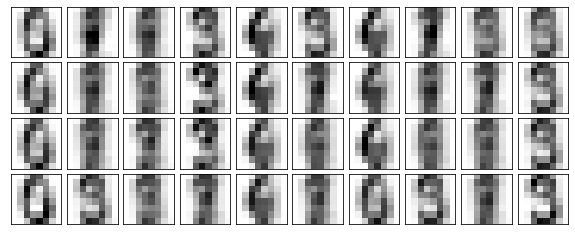

In [116]:
#Projektion umkehren und reduzierten Datensatz plotten
d_recov = model.inverse_transform(d_proj)
plot_digits(d_recov)
plt.show()

Offenkunding wurde zu viel reduziert, der Informationsverlust ist zu hoch 